In [2]:
import json
from pprint import pprint
path_to_data="/home/akhazi/Dropbox/University College London/MSc/Dissertation/Datasets/data/"
path_to_data_win="C:/Users/Adam Khazi/Dropbox/University College London/MSc/Dissertation/Datasets/data/"

In [3]:
with open(path_to_data_win + "mpd.slice.0-999.json") as f:
    data = json.load(f)

In [4]:
type(data)

dict

In [5]:
data["playlists"][0]

{'collaborative': 'false',
 'duration_ms': 11532414,
 'modified_at': 1493424000,
 'name': 'Throwbacks',
 'num_albums': 47,
 'num_artists': 37,
 'num_edits': 6,
 'num_followers': 1,
 'num_tracks': 52,
 'pid': 0,
 'tracks': [{'album_name': 'The Cookbook',
   'album_uri': 'spotify:album:6vV5UrXcfyQD1wu4Qo2I9K',
   'artist_name': 'Missy Elliott',
   'artist_uri': 'spotify:artist:2wIVse2owClT7go1WT98tk',
   'duration_ms': 226863,
   'pos': 0,
   'track_name': 'Lose Control (feat. Ciara & Fat Man Scoop)',
   'track_uri': 'spotify:track:0UaMYEvWZi0ZqiDOoHU3YI'},
  {'album_name': 'In The Zone',
   'album_uri': 'spotify:album:0z7pVBGOD7HCIB7S8eLkLI',
   'artist_name': 'Britney Spears',
   'artist_uri': 'spotify:artist:26dSoYclwsYLMAKD3tpOr4',
   'duration_ms': 198800,
   'pos': 1,
   'track_name': 'Toxic',
   'track_uri': 'spotify:track:6I9VzXrHxO9rA9A5euc8Ak'},
  {'album_name': 'Dangerously In Love (Alben für die Ewigkeit)',
   'album_uri': 'spotify:album:25hVFAxTlDvXbx2X2QkUkE',
   'artist_na

## Track Lengths

In [6]:
playlist_dist = dict()
for playlist in data["playlists"]:
    if playlist["num_tracks"] not in playlist_dist:
        playlist_dist[playlist["num_tracks"]] = 1
    else:
        playlist_dist[playlist["num_tracks"]]+=1

In [7]:
playlist_tuples = list(playlist_dist.items())
playlist_tuples.sort(key=lambda tup: tup[0])
playlist_nr_tracks=[t[0] for t in playlist_tuples]
playlist_nr_nr_tracks=[t[1] for t in playlist_tuples]

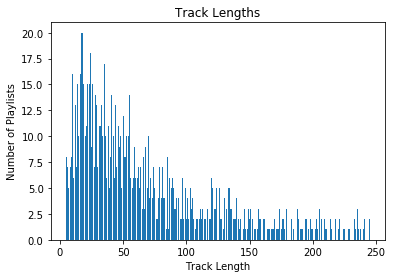

In [8]:
%matplotlib inline
import matplotlib.pyplot as plt
fig=plt.figure()
ax = fig.add_subplot(1,1,1)
ax.bar(playlist_nr_tracks, height=playlist_nr_nr_tracks)
plt.title('Track Lengths')
plt.xlabel('Track Length')
plt.ylabel('Number of Playlists')
plt.show()

## Playlist Edits

In [10]:
playlist_dist = dict()
for playlist in data["playlists"]:
    if playlist["num_edits"] not in playlist_dist:
        playlist_dist[playlist["num_edits"]] = 1
    else:
        playlist_dist[playlist["num_edits"]] += 1

In [14]:
playlist_tuples = list(playlist_dist.items())
playlist_tuples.sort(key=lambda tup: tup[0])
playlist_nr_edits=[t[0] for t in playlist_tuples]
playlist_nr_nr_edits=[t[1] for t in playlist_tuples]

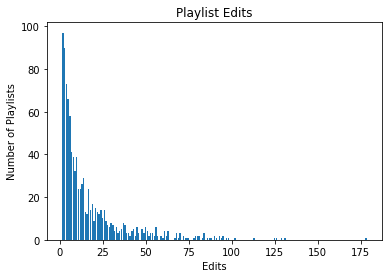

In [15]:
%matplotlib inline
import matplotlib.pyplot as plt
fig=plt.figure()
ax = fig.add_subplot(1,1,1)
ax.bar(playlist_nr_tracks, height=playlist_nr_nr_tracks)
plt.title('Playlist Edits')
plt.xlabel('Edits')
plt.ylabel('Number of Playlists')
plt.show()

## Playlist Edits (checking collaboration)

In [18]:
playlist_dist_collab_on = dict()
for playlist in data["playlists"]:
    if playlist["collaborative"] == 'true':
        if playlist["num_edits"] not in playlist_dist_collab_on:
            playlist_dist_collab_on[playlist["num_edits"]] = 1
        else:
            playlist_dist_collab_on[playlist["num_edits"]] += 1

In [19]:
playlist_dist_collab_off = dict()
for playlist in data["playlists"]:
    if playlist["collaborative"] == 'false':
        if playlist["num_edits"] not in playlist_dist_collab_off:
            playlist_dist_collab_off[playlist["num_edits"]] = 1
        else:
            playlist_dist_collab_off[playlist["num_edits"]] += 1

In [20]:
playlist_tuples = list(playlist_dist_collab_on.items())
playlist_tuples.sort(key=lambda tup: tup[0])
playlist_nr_edits_on=[t[0] for t in playlist_tuples]
playlist_nr_nr_edits_on=[t[1] for t in playlist_tuples]

In [21]:
playlist_tuples = list(playlist_dist_collab_off.items())
playlist_tuples.sort(key=lambda tup: tup[0])
playlist_nr_edits_off=[t[0] for t in playlist_tuples]
playlist_nr_nr_edits_off=[t[1] for t in playlist_tuples]

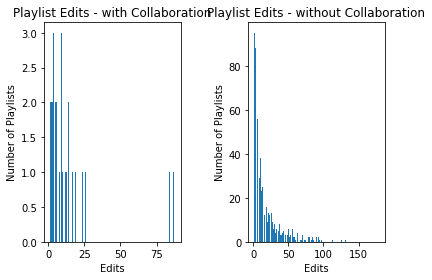

In [25]:
%matplotlib inline
import matplotlib.pyplot as plt
fig=plt.figure()
ax = fig.add_subplot(1,2,1)
ax.bar(playlist_nr_edits_on, height=playlist_nr_nr_edits_on)
plt.title('Playlist Edits - with Collaboration')
plt.xlabel('Edits')
plt.ylabel('Number of Playlists')

ax = fig.add_subplot(1,2,2)
ax.bar(playlist_nr_edits_off, height=playlist_nr_nr_edits_off)
plt.title('Playlist Edits - without Collaboration')
plt.xlabel('Edits')
plt.ylabel('Number of Playlists')

plt.tight_layout()
plt.show()